<a href="https://colab.research.google.com/github/Limm-jk/2020_Fall_MachineLearning/blob/master/BBC_sports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import chardet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_files
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [9]:
# data input
file = load_files('/content/drive/MyDrive/Colab Notebooks/bbcsport/')
X, y = file.data, file.target

In [11]:
for i in range(len(X)):
  if chardet.detect(X[i]) != "utf-8":
    X[i] = X[i].decode(chardet.detect(X[i])['encoding']).encode('utf8')

In [13]:
X = [doc.replace(b"<br />",b"") for doc in X]
X = [doc.replace(b"\n", b"") for doc in X]

In [24]:
vec = TfidfVectorizer(stop_words='english', norm = 'l2')

In [43]:
word_vec = vec.fit_transform(X)

In [49]:
print(word_vec[:5])

  (0, 6922)	0.059442081332487004
  (0, 9474)	0.0301872411451481
  (0, 8225)	0.04007796499557697
  (0, 8911)	0.036742663521754176
  (0, 2329)	0.026795804976793142
  (0, 6275)	0.033462393173715
  (0, 2629)	0.04559876568913136
  (0, 2958)	0.059442081332487004
  (0, 3812)	0.04438398078953014
  (0, 6383)	0.059442081332487004
  (0, 9478)	0.031585121002256335
  (0, 10052)	0.05348008979888304
  (0, 811)	0.03482333094560648
  (0, 983)	0.05156075722273533
  (0, 2892)	0.05156075722273533
  (0, 6615)	0.055954539855711666
  (0, 6077)	0.059442081332487004
  (0, 11658)	0.03532943783431424
  (0, 1838)	0.055954539855711666
  (0, 8568)	0.03771744157937969
  (0, 218)	0.059442081332487004
  (0, 7368)	0.059442081332487004
  (0, 9382)	0.019249512235492726
  (0, 8053)	0.0499925483221077
  (0, 4826)	0.055954539855711666
  :	:
  (4, 6039)	0.12735944641772304
  (4, 8638)	0.1709834104859885
  (4, 6455)	0.05225137154528662
  (4, 8470)	0.035185666907838635
  (4, 4139)	0.10827384607825465
  (4, 2057)	0.047291773954

In [46]:
scores = cross_val_score(LogisticRegression(max_iter=1000),word_vec,y,cv=5)
print("크로스 밸리데이션 평균 점수 : {: .4f}".format(np.mean(scores)))

크로스 밸리데이션 평균 점수 :  0.9484


In [55]:
onehot = []
for i in range(len(y)):
  arr = [0 for i in range(5)]
  arr[y[i]] += 1
  onehot.append(arr)

y = onehot
print(y[:10])

[[0, 1, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 1, 0, 0], [1, 0, 0, 0, 0]]


In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, 
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)

In [ ]:
# word_vec은 train과 test를 이미 모두 합쳐 벡터화 시킴

문자의 최대 길이 : 9475
문자의 평균 길이 :  1942.7058823529412


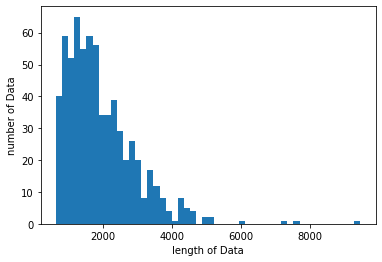

In [58]:
import matplotlib.pyplot as plt

print("문자의 최대 길이 :" , max(len(l) for l in xtrain))
print("문자의 평균 길이 : ", sum(map(len, xtrain))/ len(xtrain))
plt.hist([len(s) for s in xtrain], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

문자의 최대 길이 : 9440
문자의 평균 길이 :  2070.4324324324325


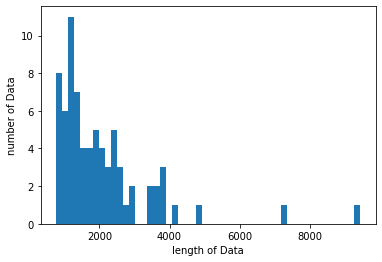

In [57]:
import matplotlib.pyplot as plt

print("문자의 최대 길이 :" , max(len(l) for l in xtest))
print("문자의 평균 길이 : ", sum(map(len, xtest))/ len(xtest))
plt.hist([len(s) for s in xtest], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()